In [1]:
# Developing code for "Direct Offset measuremeNts UTilizing Electro Optic Sampling (DONUT-EOS)"
from importlib import reload as rel;
import matplotlib.pyplot as plt;
import numpy as np;
from scipy.constants import c, epsilon_0;
from scipy.signal import find_peaks;
from time import time;
eps0 = epsilon_0;
from scipy.interpolate import interp1d, interp2d;
import sys;
sys.path.insert(0, "../../python");
sys.path.insert(0, "..\\..\\python");
sys.path.insert(0, "../transverse_resolution/");
# Custom modules
from crystal import crystal;
from ebeam import ebeam;
from laser import laser;
import phase_retard as pr;
from plotting import makefig;
import thz;
import vertical_resolution as vr;
import donut as dn;
dn = rel(dn);

In [2]:
# Bunch parameters
################################################################################
Q_drive = 1.5e-9;
Q_wit   = 0.5e-9;
sigz    = 5.2e-6;
sigt    = sigz / c;
del_z   = 150e-6;
del_t   = del_z / c;
N       = 8000;
t_beams = np.linspace(-N * sigt / 2, N * sigt / 2, N);
drive   = ebeam({'Q' : Q_drive, 'sigz' : sigz, 'del_z' : 0, 't' : t_beams});
wit     = ebeam({'Q' : Q_wit, 'sigz' : sigz, 'del_z' : del_z, 't' : t_beams});
################################################################################
# Crystal parameters
ctype = 'GaP';
d     = 100e-6;
x     = 1e-2;
y     = 1e-2;
rez   = 10e-6;
nx    = int(x/rez);
ny    = int(y/rez);
x0    = [.1e-3, 0.1e-3]
y0    = [0.0e-3, 0.0e-3];
x_arr = np.linspace(-x/2, x/2, nx);
y_arr = np.linspace(-y/2, y/2, ny);
tau   = np.zeros((len(x_arr), len(y_arr)));

################################################################################
# Probe laser
lambda0 = 800e-9;
dy = 27e-9;
tp = 30e-15;
psi = 15;
psi_rad = psi * np.pi / 180;
probe = laser({'y0' : lambda0, 'dy' : dy, 'tp' : tp})
td    = 4.0e-12;

In [3]:
start = time();
g_drive, g_wit, gma = dn.get_signal(drive, wit, probe, psi, ctype, d, x0, x, y0, y, td);
print(time() - start)

Initalizing for loop...
Looping...
44.2875554561615


In [4]:
# Interpolate gamma to get the proper resoultion of the CCD
x_int   = np.linspace(-x/2, x/2, 1000);
y_int   = np.linspace(-y/2, y/2, 1000);
f_gma   = interp2d(x_int, y_int, gma);
gma_int = f_gma(x_arr, y_arr); 

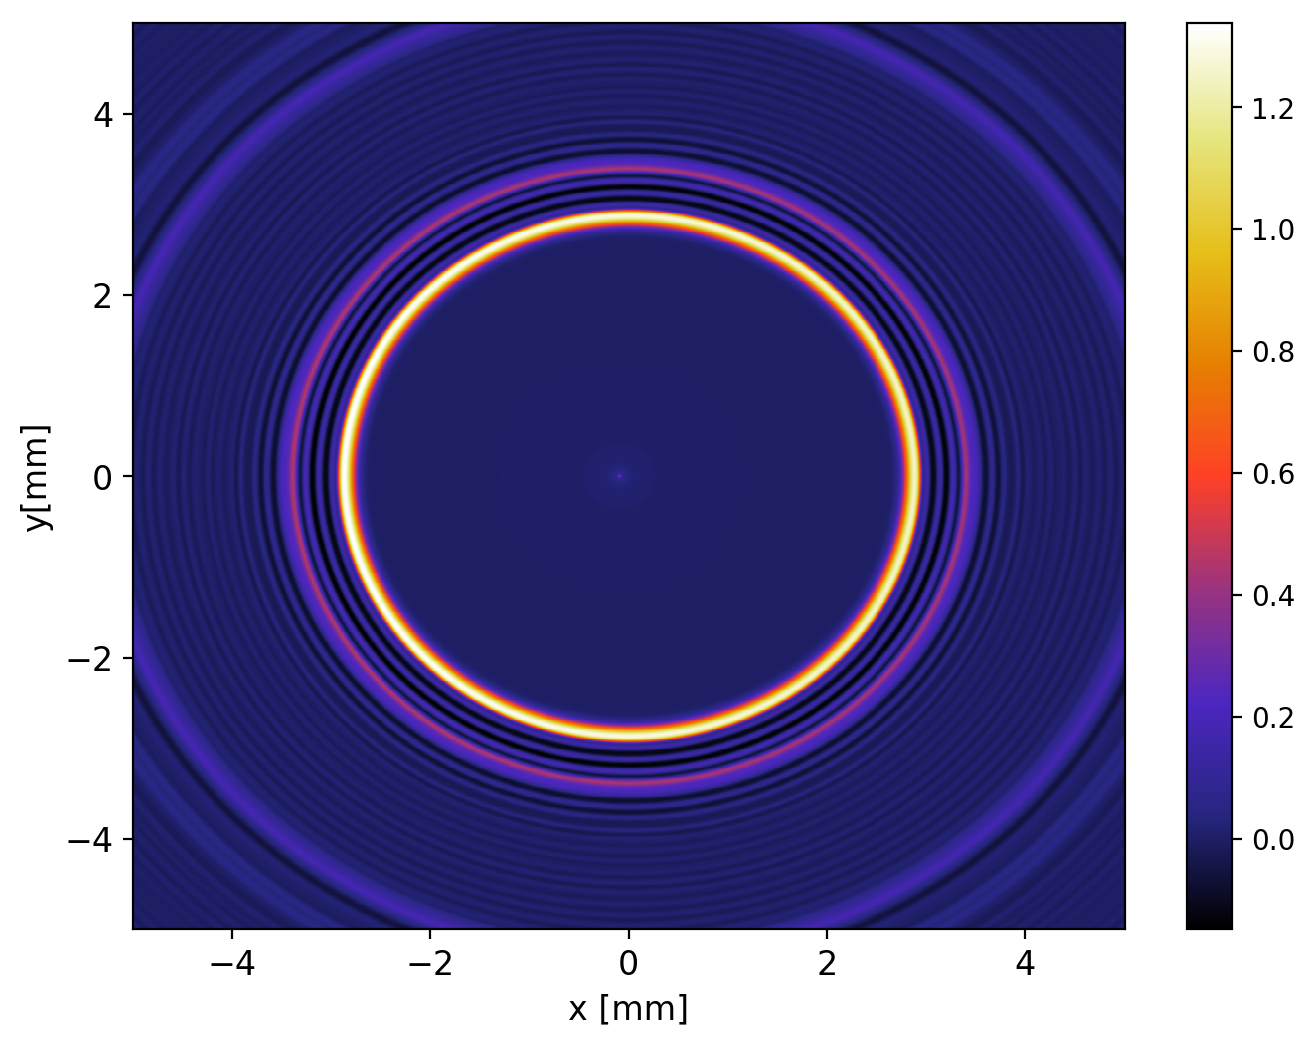

In [5]:
fig, ax = makefig(x = 8, y = 6, xlab = 'x [mm]', ylab = 'y[mm]');
ext = np.array([min(x_arr), max(x_arr), min(y_arr), max(y_arr)]) * 1e3;
img = ax.imshow(np.transpose(gma_int), extent = ext, aspect = 'auto', cmap = 'CMRmap');
cbar = plt.colorbar(mappable = img);
plt.show();

In [6]:
sig = np.sin(gma_int / 2)**2;
sig = sig / np.amax(sig);

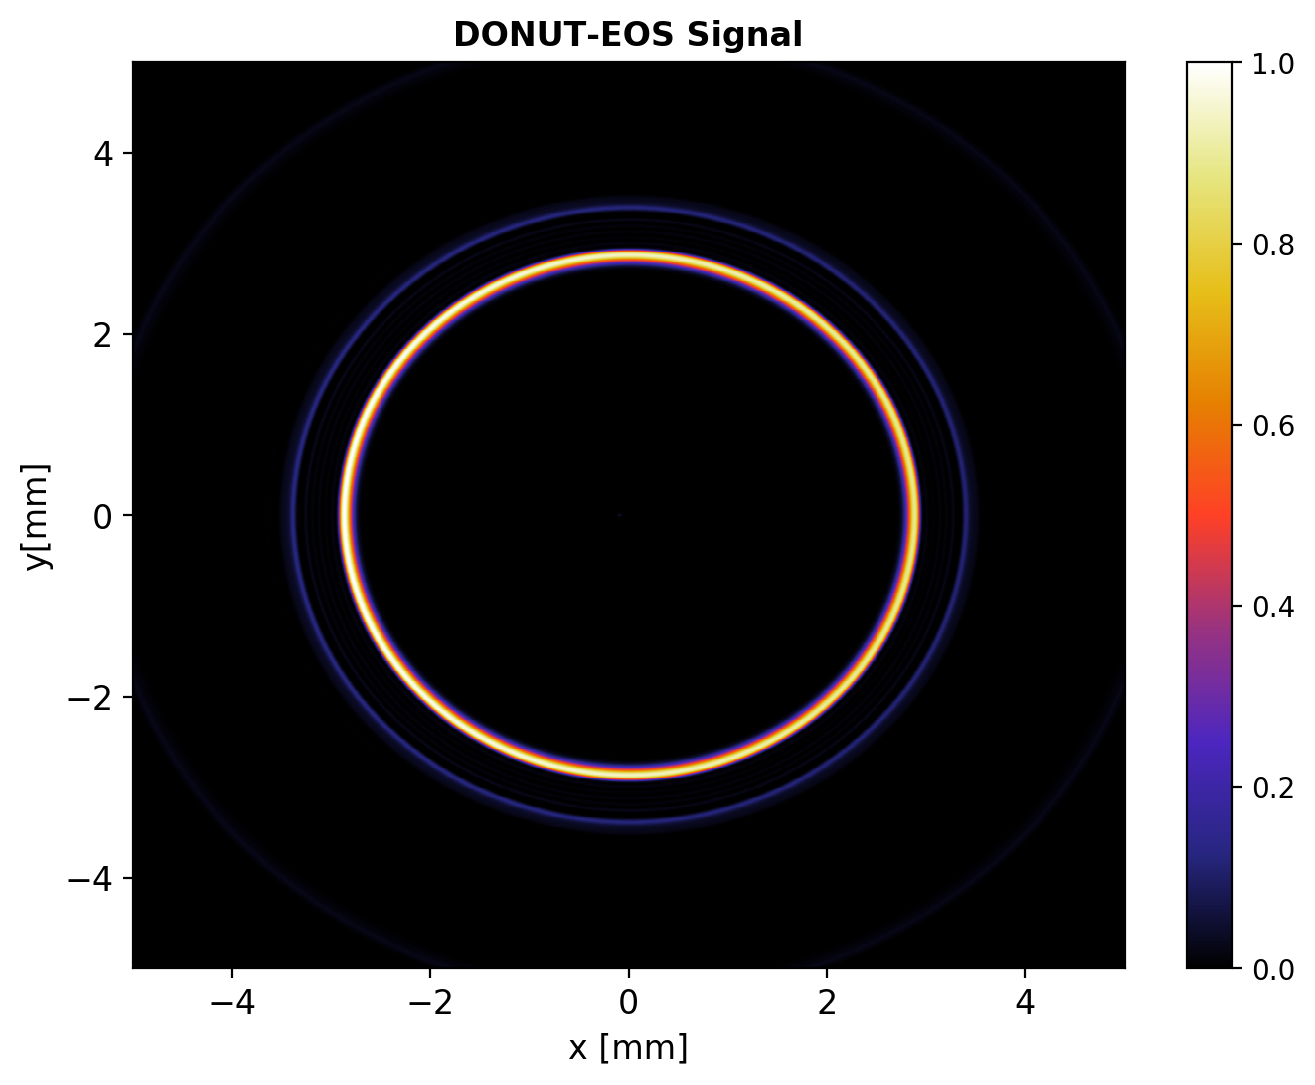

In [7]:
fig, ax = makefig(x = 8, y = 6, xlab = 'x [mm]', ylab = 'y[mm]', title = 'DONUT-EOS Signal');
ext = np.array([min(x_arr), max(x_arr), min(y_arr), max(y_arr)]) * 1e3;
img = ax.imshow(np.transpose(sig), extent = ext, aspect = 'auto', cmap = 'CMRmap');
cbar = plt.colorbar(mappable = img);
plt.show();

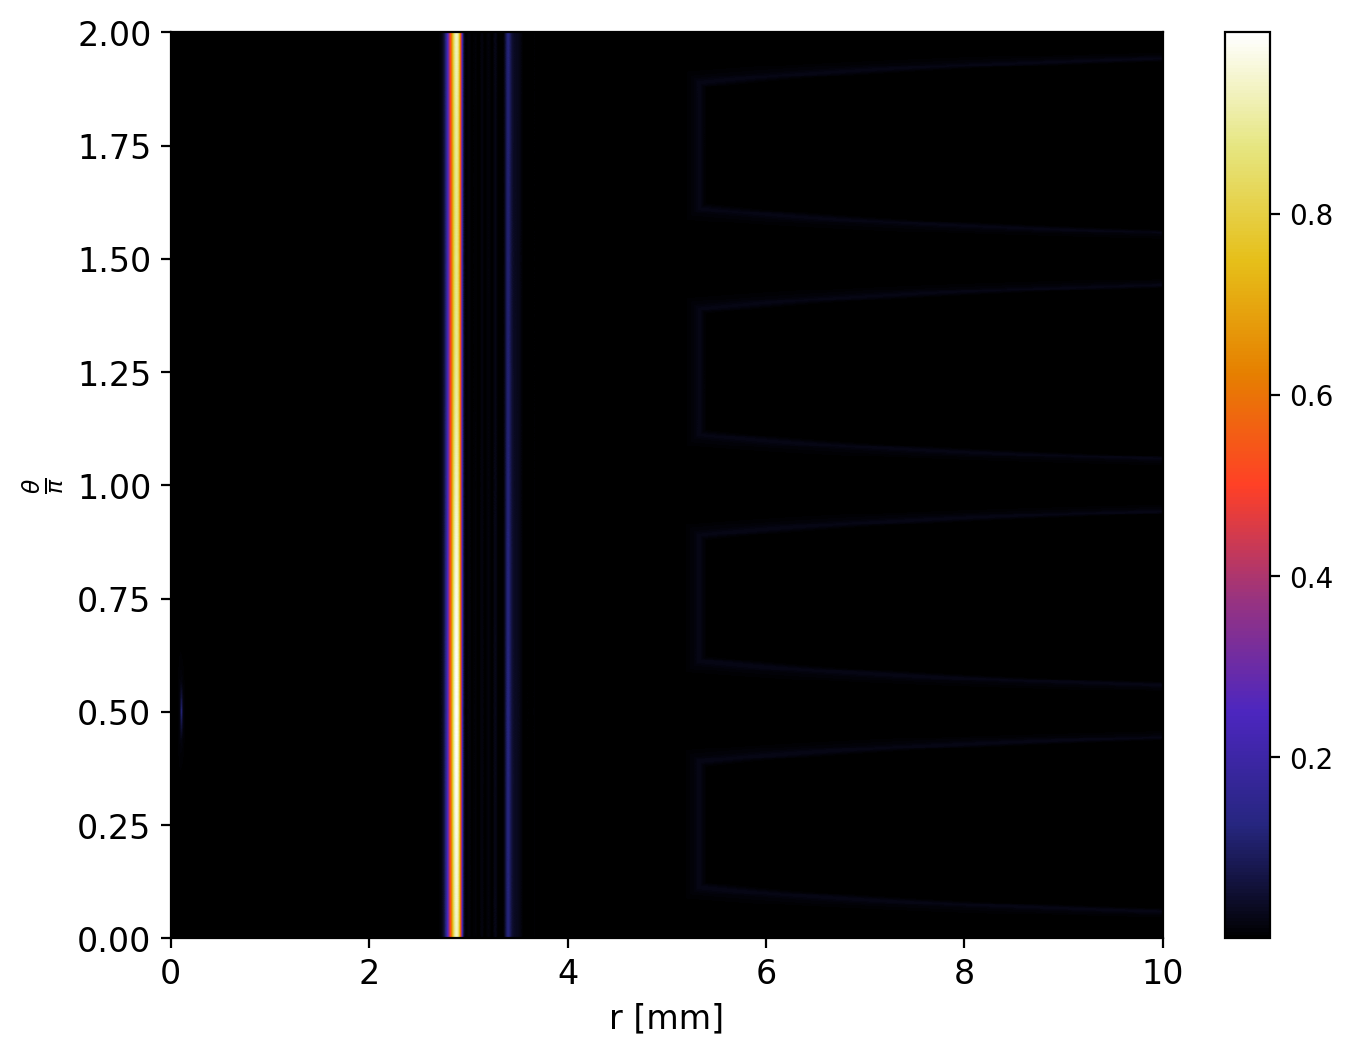

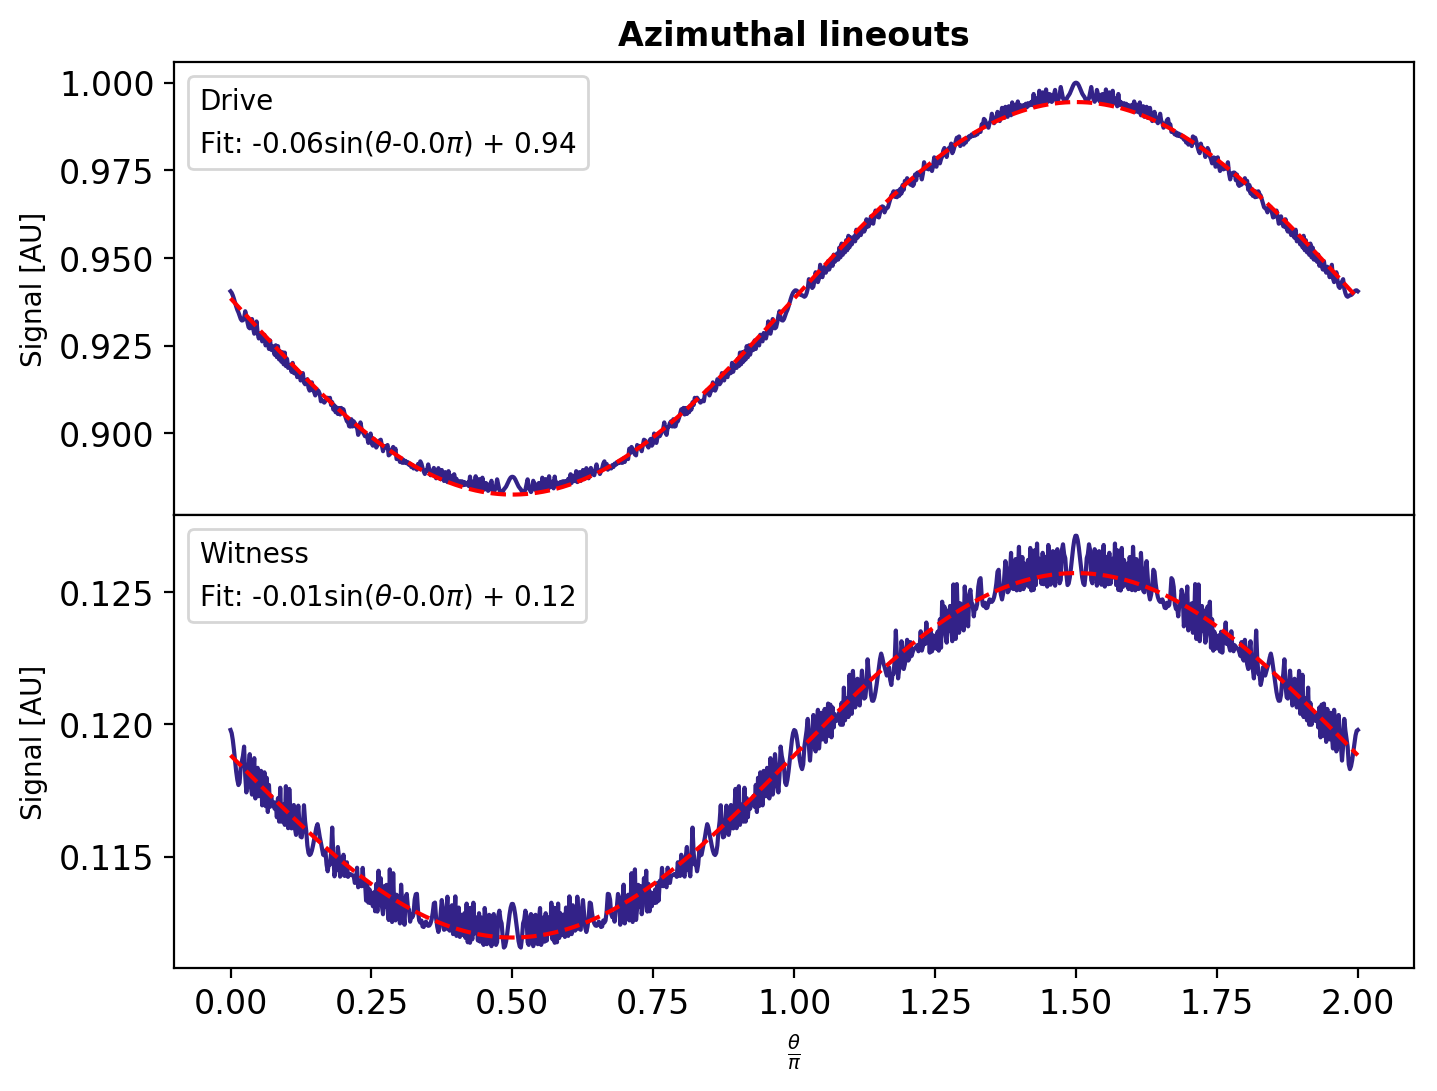

In [12]:
dn = rel(dn);
sig_polar, azi_drive, azi_wit = dn.azi_lineout(sig, x_arr, y_arr, plot = True);

In [ ]:
fig, ax = makefig(x = 8, y = 6, dp)

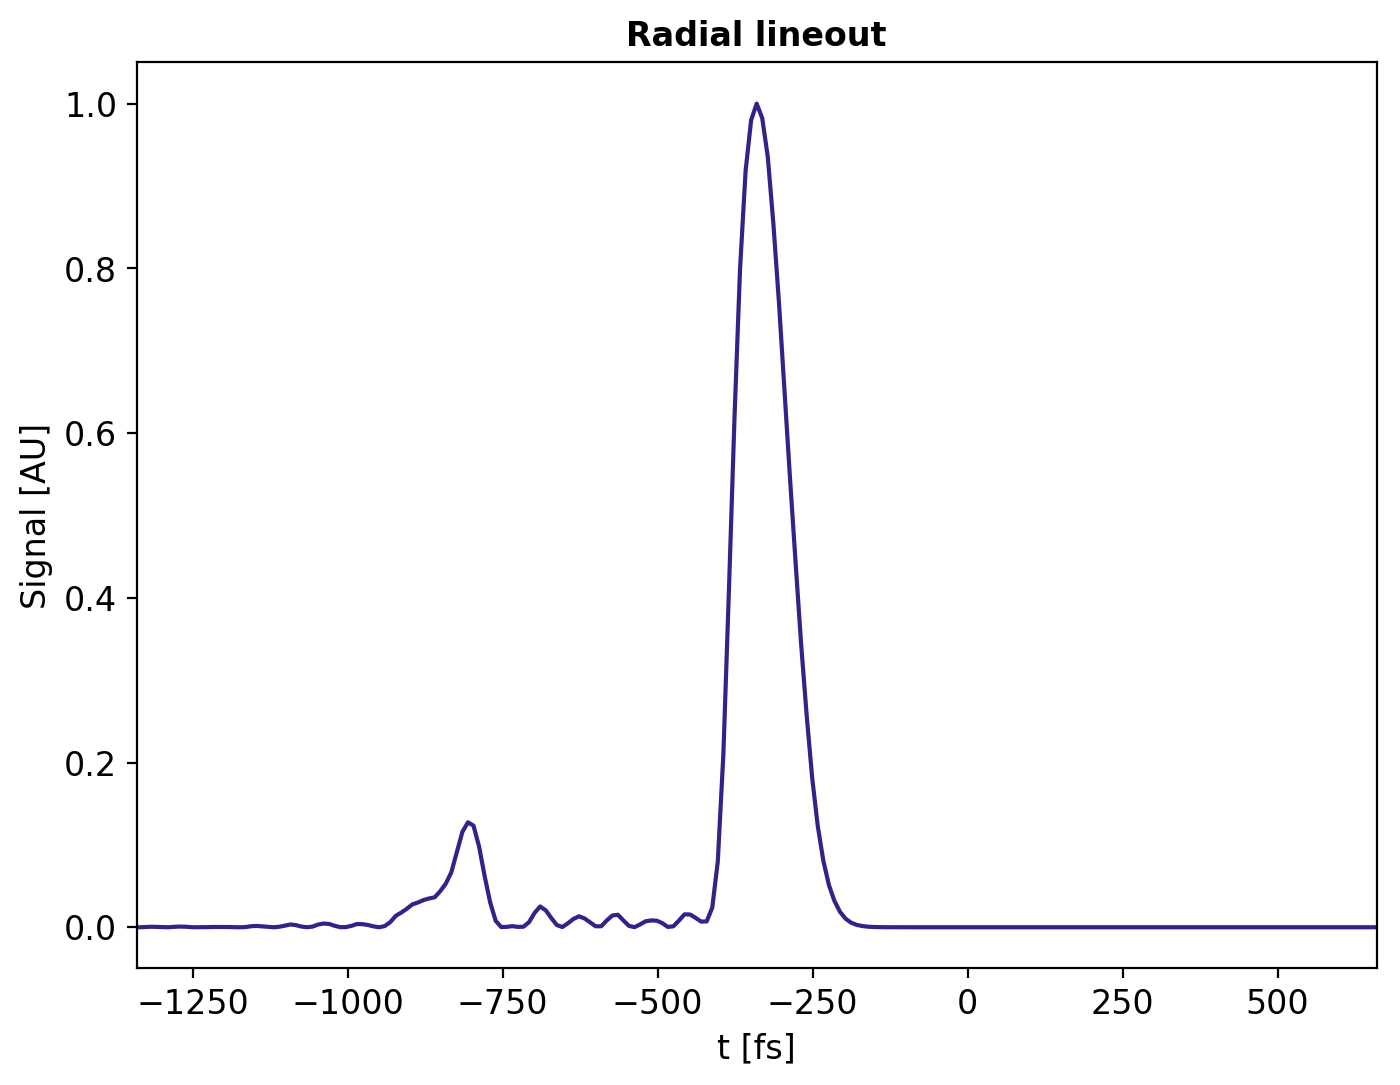

In [17]:
dn = rel(dn);
direction = ['y', '-'];
lineout, t_plot = dn.radial_lineout(sig, x_arr, y_arr, direction, psi, title = 'Radial lineout', plot = True);